In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/dataset/training.zip', 'r') as train:
    train.extractall('/content')"""

"import zipfile\nwith zipfile.ZipFile('/content/drive/MyDrive/dataset/training.zip', 'r') as train:\n    train.extractall('/content')"

In [2]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [3]:
from google.colab.patches import cv2_imshow

In [ ]:
"""img = cv2.imread("/content/training/hi/displayPanel_0_c11_67_flip_sharpen.jpg")
cv2_imshow(img)"""

'img = cv2.imread("/content/training/hi/displayPanel_0_c11_67_flip_sharpen.jpg")\ncv2_imshow(img)'

In [ ]:
"""import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/dataset/test.zip', 'r') as test:
    test.extractall('/content')"""

"import zipfile\nwith zipfile.ZipFile('/content/drive/MyDrive/dataset/test.zip', 'r') as test:\n    test.extractall('/content')"

In [ ]:
"""img = cv2.imread("/content/test/15.jpg")
cv2_imshow(img)"""

'img = cv2.imread("/content/test/15.jpg")\ncv2_imshow(img)'

In [4]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [5]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [6]:
path = "/content/drive/MyDrive/dataset/training.zip"
shutil.rmtree('/tmp')

local_zip = path
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [7]:
print(len(os.listdir('/tmp/training/background/')))
print(len(os.listdir('/tmp/training/hi/')))

4450
1425


In [8]:
try:
    #YOUR CODE GOES HERE
    os.mkdir('/tmp/char-v-normal')
    os.mkdir('/tmp/char-v-normal/training')
    os.mkdir('/tmp/char-v-normal/validation')
    
    os.mkdir('/tmp/char-v-normal/training/normal')
    os.mkdir('/tmp/char-v-normal/training/text')
    
    os.mkdir('/tmp/char-v-normal/validation/normal')
    os.mkdir('/tmp/char-v-normal/validation/text')
    
except OSError:
    pass

In [9]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file):
            files.append(filename)
        else:
            print("Length was 0")
            
    training_length = int(len(files) * SPLIT_SIZE)
    val_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    val_set = shuffled_set[-val_length:]

    for filename in training_set:
        copyfile(SOURCE + filename, TRAINING + filename)

    for filename in val_set:
        copyfile(SOURCE + filename, VALIDATION + filename)


NORMAL_SOURCE_DIR = "/tmp/training/background/"
TRAINING_NORMAL_DIR = "/tmp/char-v-normal/training/normal/"
VALIDATION_NORMAL_DIR = "/tmp/char-v-normal/validation/normal/"
CHAR_SOURCE_DIR = "/tmp/training/hi/"
TRAINING_CHARS_DIR = "/tmp/char-v-normal/training/text/"
VALIDATION_CHARS_DIR = "/tmp/char-v-normal/validation/text/"

split_size = .85

split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, VALIDATION_NORMAL_DIR, split_size)
split_data(CHAR_SOURCE_DIR, TRAINING_CHARS_DIR, VALIDATION_CHARS_DIR, split_size)

In [11]:
print(len(os.listdir('/tmp/char-v-normal/training/normal/')))
print(len(os.listdir('/tmp/char-v-normal/training/text/')))

print(len(os.listdir('/tmp/char-v-normal/validation/normal/')))
print(len(os.listdir('/tmp/char-v-normal/validation/text/')))

3782
1211
668
214


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
TRAINING_DIR = '/tmp/char-v-normal/training'
train_datagen = ImageDataGenerator(rescale=1 / 255, rotation_range=40,
                                  width_shift_range = 0.2, height_shift_range = 0.2,
                                  shear_range= 0.2, zoom_range = 0.2,
                                  horizontal_flip = True, fill_mode ='nearest')


train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=128,
    class_mode='binary',
    target_size=(150, 150)
  
)

VALIDATION_DIR = '/tmp/char-v-normal/validation'
validation_datagen = ImageDataGenerator(rescale= 1/255,
                                        rotation_range=40,
                                        width_shift_range=.2,
                                        height_shift_range=.2,
                                        shear_range=.2,
                                        zoom_range=.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')


validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=128,
    class_mode='binary',
    target_size=(150, 150)
)

Found 4993 images belonging to 2 classes.
Found 882 images belonging to 2 classes.


In [14]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 39,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=6,
                              verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
39/39 [==============================] - 40s 912ms/step - loss: 1.2491 - acc: 0.7149 - val_loss: 0.4960 - val_acc: 0.7799
Epoch 2/20
39/39 [==============================] - 35s 896ms/step - loss: 0.4581 - acc: 0.8064 - val_loss: 0.3453 - val_acc: 0.8529
Epoch 3/20
39/39 [==============================] - 35s 888ms/step - loss: 0.3542 - acc: 0.8606 - val_loss: 0.3294 - val_acc: 0.8633
Epoch 4/20
39/39 [==============================] - 35s 904ms/step - loss: 0.3169 - acc: 0.8754 - val_loss: 0.3281 - val_acc: 0.8737
Epoch 5/20
39/39 [==============================] - 36s 920ms/step - loss: 0.3133 - acc: 0.8802 - val_loss: 0.2858 - val_acc: 0.8867
Epoch 6/20
39/39 [==============================] - 35s 896ms/step - loss: 0.3220 - acc: 0.8791 - val_loss: 0.2288 - val_acc: 0.9023
Epoch 7/20
39/39 [==============================] - 34s 880ms/step - loss: 0.2684 - acc: 0.8890 - val_loss: 0.2335 - val_acc: 0.8997
Epoch 8/20
39/39 [==============================] - 35s 896ms/step - 

In [15]:
model.save('final-normal-vs-char.h5')

Text(0.5, 1.0, 'Training and validation loss')

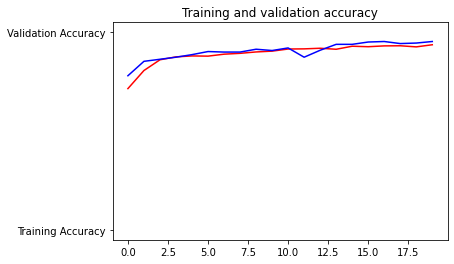

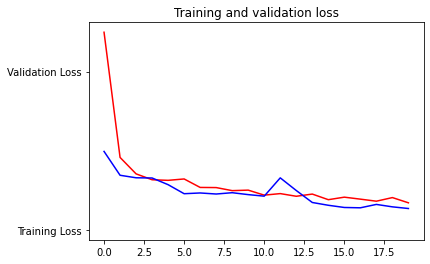

In [16]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [17]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/dataset/test.zip', 'r') as test:
    test.extractall('/content')

In [18]:
import pandas as pd

test_file = os.listdir("/content/test")
test_df = pd.DataFrame({
    'filename': test_file
})
test_df

,filename
0,19.jpg
1,61.jpg
2,3.jpg
3,11.jpg
4,72.jpg
...,...
93,98.jpg
94,93.jpg
95,28.jpg
96,76.jpg


In [19]:
TESTING_DIR = '/content/test'
test_generator = train_datagen.flow_from_dataframe(
    test_df,
    directory = TESTING_DIR,
    x_col='filename',
    y_col=None,
    batch_size=32,
    target_size=(150, 150),
    shuffle = False,
    class_mode = None
)

Found 98 validated image filenames.


In [20]:
test_generator.reset()
y_pred = model.predict(test_generator)

In [21]:
train_generator.class_indices

{'normal': 0, 'text': 1}

In [22]:
y_pred_classification = np.where(y_pred > 0.5, 1, 0)
y_pred_classification

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

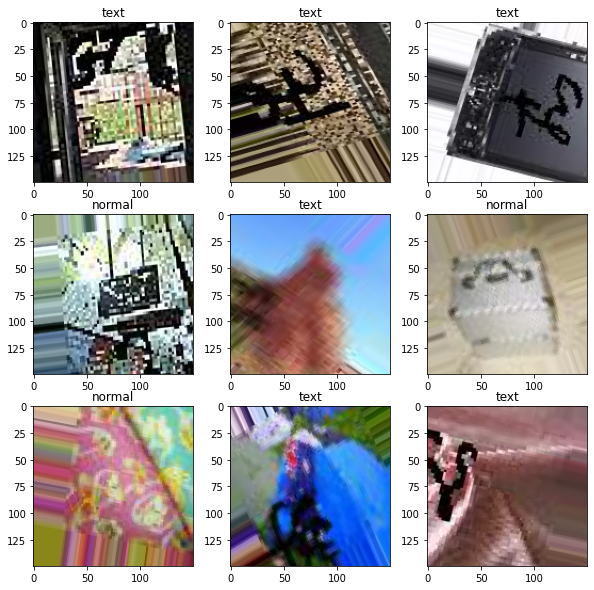

In [24]:
test_generator.reset()
test_images = test_generator[0][:9]

fig, ax = plt.subplots(3,3)
fig.set_size_inches(10,10)
for i, img in enumerate(test_images):
    ax[i//3][i%3].imshow(img)
    if y_pred_classification[i]==1:
        label = 'text'
    else:
        label = 'normal'
    ax[i//3][i%3].set_title(label)


In [25]:
model.layers

(148, 148, 32)


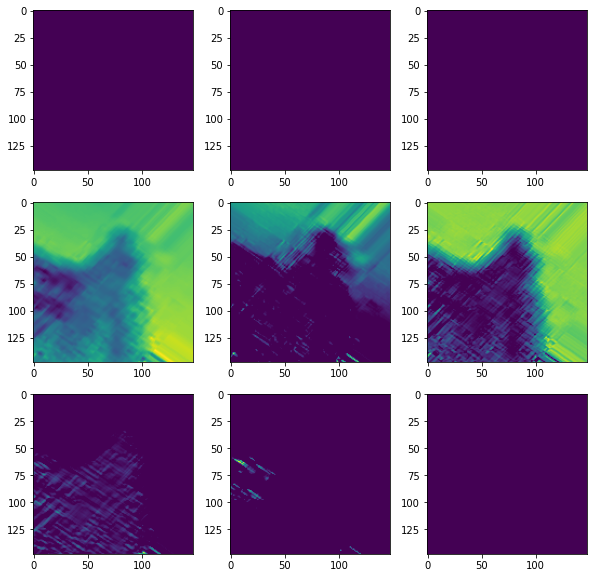

In [26]:
first_conv = model.layers[0]
output_layer1 = first_conv(test_images)[4]

print(output_layer1.shape)
fig, ax = plt.subplots(3,3)
fig.set_size_inches(10,10)
for i in range(9):
  ax[i//3][i%3].imshow(output_layer1[:,:,i])

In [29]:
la = []
for i in y_pred_classification:
  if i==0:
    la.append(0)
  elif i==1:
    la.append(1)

In [30]:
la

[1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0]

In [31]:
test_df['label'] = la
test_df.sort_values(by=['filename'])

,filename,label
83,1.jpg,1
10,10.jpg,0
3,11.jpg,0
24,12.jpg,0
89,13.jpg,1
...,...,...
71,94.jpg,1
45,95.jpg,0
97,96.jpg,0
85,97.jpg,0


In [32]:
ldict = dict(test_df.values)

In [33]:
lsorted = sorted(test_df['filename'], key=lambda x: int(os.path.splitext(x)[0]))

In [34]:
llabel = []
for i in lsorted:
  llabel.append(ldict[i])

In [35]:
final = pd.DataFrame()
final['filename'] = lsorted
final['label'] = llabel
submission = dict(final.values)

In [36]:
import json
with open("submission.json", "w") as outfile:
	json.dump(submission, outfile)

In [ ]:
submission = pd.read_csv('../input/dogs-vs-cats/sampleSubmission.csv')
submission['label'] = y_pred_classification
submission

FileNotFoundError: ignored

In [ ]:
submission.to_csv('submission.csv',index='False')

In [ ]:
"Hiiiiiiiiiiiiiiiiiiiii?"